# Cosine Distance Calculation and Visualization
*By: Jack Skupien*

### **Calculation**

#### Import and Initialize

In [98]:
#import
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
import ast
#visualization
import matplotlib.pyplot as plt
plt.style.use('dark_background')#dark mode
import seaborn as sns


#initialize
models=["Bart","Gemini","Pegasus","T5"]
cluster_dists={}
cluster_stats={}

#### Helper Functions
1. **Load and Parse Embeddings Function**

    Arg Usage:
    * `model`: (string) the model name of the embedding *(Ex. "Bart")*

2. **Compute Cluster Distances Function**

    Arg Usage:
    * `embeddings`: (NumPy.vstack) the the embeddings of a single model

In [99]:
def parse_embeddings(model):
    df=pd.read_csv(f"../../Embeddings/{model}_sum_embeddings-clean.csv")
    df["embedding"]=df["EMBEDDING"].apply(ast.literal_eval)
    embeddings=np.vstack(df["embedding"].to_numpy())
    return embeddings

def compute_cluster_tightness(embeddings):
    centroid=np.mean(embeddings,axis=0,keepdims=True)
    distances=cosine_distances(embeddings,centroid).flatten()
    return distances

#### Load, Parse, and Calculate The Stats of Each Embedding

In [100]:
for model in models:
    emb=parse_embeddings(model)
    dists=compute_cluster_tightness(emb)
    cluster_dists[model]=dists
    cluster_stats[model]={
        "mean_cosine_distance":np.mean(dists),
        "std_cosine_distance":np.std(dists),
        "min_distance":np.min(dists),
        "max_distance":np.max(dists)
    }

#### Output Results

In [101]:
for model, stats in cluster_stats.items():
    print(f"{model} cluster stats:")
    for k, v in stats.items():
        print(f"  {k}: {v:.4f}")
    print()

Bart cluster stats:
  mean_cosine_distance: 0.2327
  std_cosine_distance: 0.0789
  min_distance: 0.0900
  max_distance: 0.9836

Gemini cluster stats:
  mean_cosine_distance: 0.2741
  std_cosine_distance: 0.0746
  min_distance: 0.1053
  max_distance: 0.5884

Pegasus cluster stats:
  mean_cosine_distance: 0.3088
  std_cosine_distance: 0.0896
  min_distance: 0.1303
  max_distance: 1.0024

T5 cluster stats:
  mean_cosine_distance: 0.2877
  std_cosine_distance: 0.0861
  min_distance: 0.1153
  max_distance: 0.5782



### **Visualization**

<!-- #### Plot Functions
1. **Tukey Plot**

    Arg Usage:
    * `dists`: (dict) distance data
    * `outliers`: (bool) whether or not to include outlier dots in the tukey plot

2. **Violin Plot**

    Arg Usage:
    * `dists`: (dict) distance data -->
#### Tukey Plot

/var/folders/8s/87fx2s5d6fsdx0q2xj19_xw40000gn/T/ipykernel_33395/1056909410.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


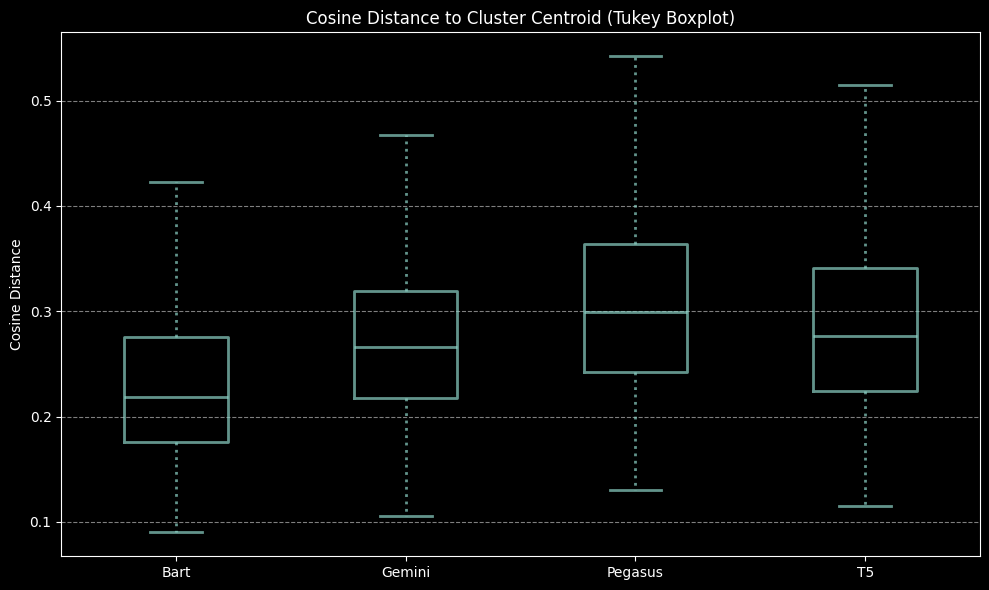

In [102]:
# def tukey(dists,outliers=True):
c="C0"          #color
a=0.7           #alpha val
linewidth=2     #linewidth
outliers=False  #show fliers
plt.figure(figsize=(10, 6))
plt.boxplot(
    list(cluster_dists.values()),
    labels=list(cluster_dists.keys()),
    vert=True,
    boxprops=dict(color=c,alpha=a,linewidth=linewidth),
    capprops=dict(color=c,alpha=a,linewidth=linewidth),
    whiskerprops=dict(color=c,alpha=a,linewidth=linewidth,linestyle=':'),
    medianprops=dict(color=c,alpha=a,linewidth=linewidth),
    showfliers=outliers)
plt.title("Cosine Distance to Cluster Centroid (Tukey Boxplot)")
plt.ylabel("Cosine Distance")
plt.grid(True, axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

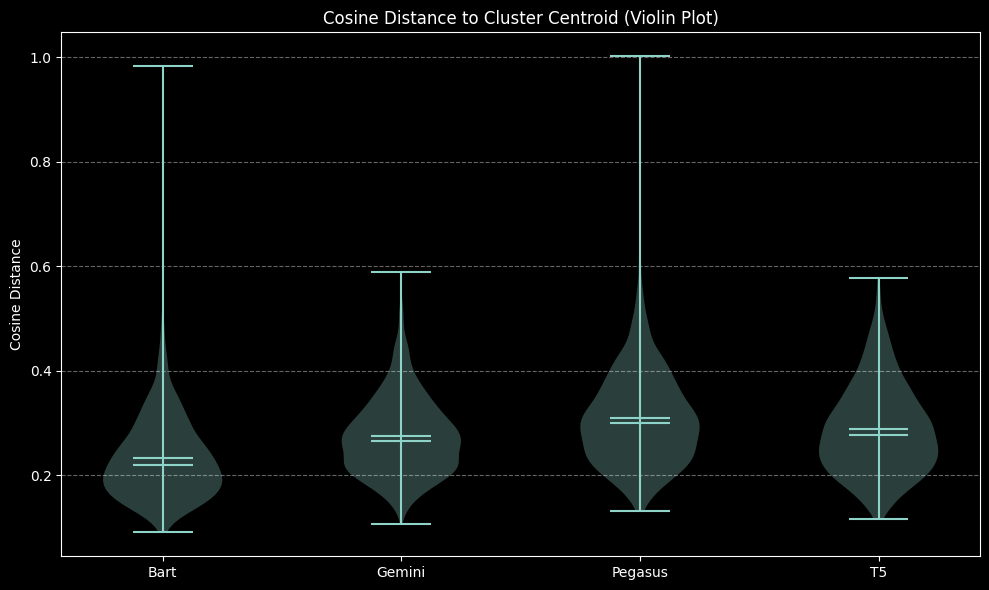

In [103]:
# def violin(dists):
plt.figure(figsize=(10, 6))
# '''violin_parts='''
plt.violinplot(
    list(cluster_dists.values()),
    showmeans=True,        #show mean line
    showextrema=True,      #show min/max
    showmedians=True       #show median
    # color='lime'
)

# for pc in violin_parts['bodies']:
#     pc.set_facecolor('lime')
#     pc.set_edgecolor('lime')
# Set x-ticks and labels manually since violinplot doesn't do it automatically
plt.xticks(
    ticks=np.arange(1, len(cluster_dists) + 1),
    labels=list(cluster_dists.keys())
)

plt.title("Cosine Distance to Cluster Centroid (Violin Plot)")
plt.ylabel("Cosine Distance")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()